# Loops & Orbits &mdash; HW3 Solution &mdash; Jupyter Notebook

## Charging a Capacitor

This solution started with Notebook 3-1 (Litihium-Ion Battery Charging).

In [1]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each function we write:
import unittest

## Constants

Some suggested constants were sent by email. In this notebook, the product of R and C has been chosen to be 120 seconds.

In [2]:
# The following two parameters establish the simulation time step and its maximum total duration:
delta_t = 0.1                  # simulation time step in seconds
simulation_time_steps = 6000   # 10 minutes of charging for a delta_t of 0.1

# DC supply
v0 = 12.0 # DC supply voltage in volts

# Capacitance
capacitance = 50 * 10**-3      # 50 mF

# Resistance
resistance = 2400              # 2.4 k-ohms

# Conversion factor
seconds_in_a_minute = 60

## The For Loop That Does the Work

In [3]:
# Initialize the charge state
# These charges will be filled in as the for loop runs.
charges = np.zeros((simulation_time_steps + 1,))

# Initialize the times
times = np.zeros((simulation_time_steps + 1,))

# The 0th elements of charges and times are already filled in.
# Start the loop with i = 1 and go for 18000 more steps
for i in range(1, simulation_time_steps + 1):
    #
    # get all the before values
    #
    # charge state
    before_charge = charges[i - 1]
    # time
    before_time = times[i - 1]
    #
    # get the charging rate -- this is where the physics is -- remind me to put the physics on the whiteboard!
    #
    capacitor_voltage = before_charge / capacitance
    voltage_difference = v0 - capacitor_voltage
    charging_rate = voltage_difference / resistance
    
    # Now it's pretty much the usual update code:
    after_charge = before_charge + charging_rate * delta_t
    after_time = before_time + delta_t
    #
    # assign the after values into their lists
    #
    charges[i] = after_charge
    times[i] = after_time


## Graph

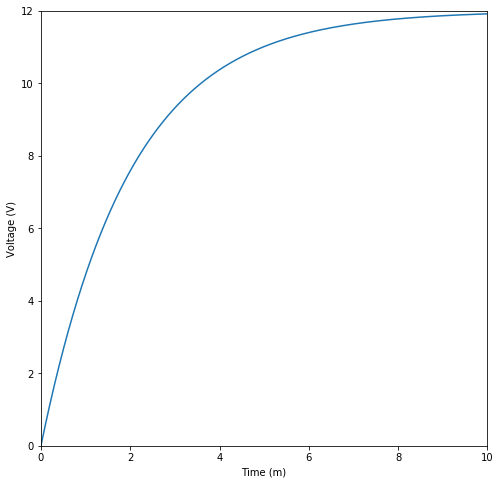

In [4]:
plt.figure(figsize=(8, 8))

plt.plot(times / seconds_in_a_minute, charges / capacitance)

plt.xlabel("Time (m)")
plt.ylabel("Voltage (V)")

# Size the x-axis to go from 0 to the maximum time in hours
plt.xlim(0.0, delta_t * simulation_time_steps / seconds_in_a_minute)

plt.ylim(0.0, v0)

# Size the y-axis to run from empty to full (0 to capacity_mAh):

plt.show()

## Conclusion

Looks like the capacitor is very close to 12V after 10 minutes of charging.